# Medium : Modelo de Regressão Linear Simples

## 1. Carregando os Dados

In [24]:
# Import libraries for working with data
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Load the data
# ==============================================================================
data = pd.read_csv("train.csv")

## 2. Compreendendo os Dados

In [26]:
# Info about data
# ==============================================================================
data.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [27]:
# Info about data
# ==============================================================================
data.shape

(700, 2)

In [40]:
# Info about data
# ==============================================================================
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 32.5 KB


In [29]:
# Eliminando os valores nulos
# ==============================================================================
data.dropna(inplace = True)

In [30]:
# Info Data
# ==============================================================================
data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


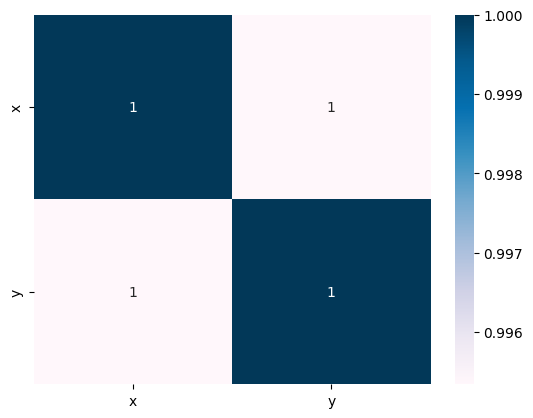

In [45]:
# Correlation between variables
# ==============================================================================
ax = sns.heatmap(data.corr(), annot  = True , cmap= "PuBu")

## 3. Construindo o Modelo

In [32]:
# Split the data into independent and dependent variables
# ==============================================================================
X = data.drop(["y"], axis = 1)
Y = data["y"]

In [33]:
# Split the data into train and test data
# ==============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.3)

In [34]:
# Implement the Model of Linear Regression
# Contruct the Model
# ==============================================================================
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# Training the model
model.fit(X_train,Y_train)


#Information about the model
print("Intercept b:", model.intercept_)
print("Slope m: ", model.coef_)


Intercept b: -0.0979423209232948
Slope m:  [0.999368]


## 4. Encontrando os Residuos

In [35]:
# Find the redidues
# ==============================================================================
pred_train = model.predict(X_train)
df = pd.DataFrame({"Observed value": Y_train, "Predicted value": pred_train})
df["Residue"] = df["Observed value"]-df["Predicted value"]
df

,Observed value,Predicted value,Residue
358,37.362984,37.878042,-0.515057
649,84.480457,88.845810,-4.365353
292,50.507118,54.867298,-4.360180
421,84.211915,86.847074,-2.635159
177,86.790023,81.850234,4.939789
...,...,...,...
71,66.734661,63.861610,2.873051
106,74.831350,70.857186,3.974164
271,46.943627,50.869826,-3.926199
436,85.593087,86.847074,-1.253987


## 5. Gráfica da linha de Regressão

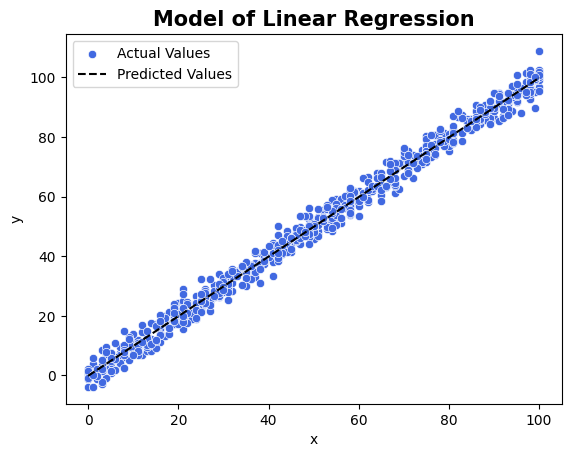

In [36]:
# Regression Line
# ==============================================================================
ax = sns.scatterplot(x = data["x"], y = data["y"], color= "royalblue", label = "Actual Values")
ax.set_title("Model of Linear Regression", size = 15 , weight ="bold")
ax = sns.lineplot(x= data["x"], y= df["Predicted value"], color = "black", linestyle = "--", label = "Predicted Values")


## 6. Diagnóstico dos Residuos

Text(0.5, 1.0, 'Distribution of Residues')

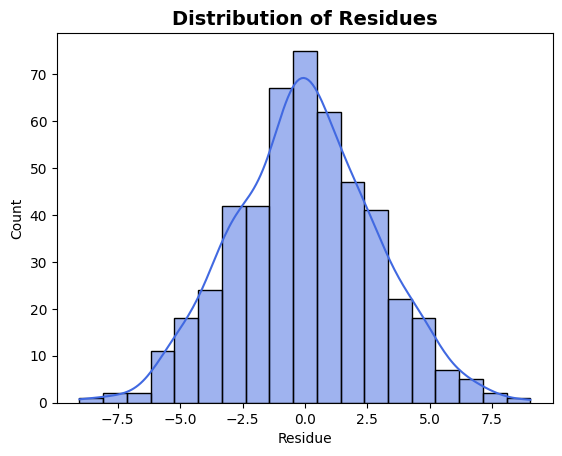

In [37]:
# The distribution of the residual is normally distributed
# ==============================================================================
ax = sns.histplot(df["Residue"], kde = True , color= "royalblue")
ax.set_title("Distribution of Residues", fontsize = 14, weight="bold")


<Axes: title={'center': 'The Variance of Residue'}, ylabel='Residue'>

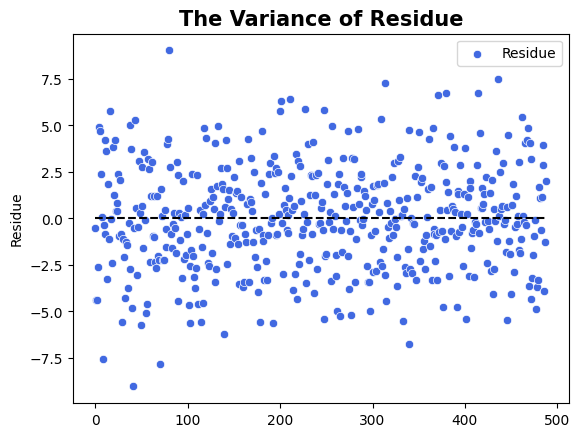

In [38]:
# The variance in the residual throughout the data is the same
# ==============================================================================
ax = sns.scatterplot(x = range(len(Y_train)), y = df["Residue"], data = df, color = "royalblue", label = "Residue")
ax.set_title("The Variance of Residue", fontsize= 15, weight = "bold")
plt.ylabel("Residue")
sns.lineplot(x = range(len(Y_train)), y =0  , color= "black" , linestyle = '--')

## 7. Evaluando o Desempenho de Nosso Modelo

In [39]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluate the perform of our model
# ==============================================================================
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_test,y_pred)
print("The error of our model is :", error)

The error of our model is : 7.8123438592786085


## **8. Conclusões**

* Construimos um modelo de regressão linear simples, a qual cumpre com as assunções de uma regressão linear:
    *   As variáveis dependendentes e independentes presentam uma alta correlação.
    *   Podemos constatar por medio da gráfica de distribução dos residuos que a média de nossos residuos está localizada ao redor de zero.
    *   Podemos visualizar que a distribução dos residuos aprenseta uma distrubução normal.
    *  Podemos observar que o residuo obtido está igualmente distribuido ao longo da linha y=0.
*  Os pontos anteriormentes comentados são boms indicadores de que nosso modelo está predizendo razoavelmente bem.
* Nosso modelo tem a seguiente equação :

\begin{equation}
\fbox{$y = 0.99 × x -0.09$}
\end{equation}

* Nosso modelo aprensenta um error quadratico médio de 7.81, isso quer dizer, nossas predições se afastam 7.81 unidades do  valor real.




## Referência

*  https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf
*  Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
*  https://medium.com/@johanrenzosm/meu-primeiro-post-construindo-um-modelo-de-regress%C3%A3o-linear-simples-e75d71114606